<a href="https://colab.research.google.com/github/falahamro/Data-Science--Foreseeing-Variable-Problems-in-Building-ML-Models/blob/main/Identifying_a_linear_relationship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear models assume that the dependent variables X take a linear relationship with the dependent variable Y. If the assumption is not met, the model may show poor performance. In this recipe, we will learn how to visualize the linear relationships between X and Y.

In [1]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns


# for linear regression
from sklearn.linear_model import LinearRegression

Linear relationships can be assessed by scatter plots.

In [2]:
# create a toy dataframe with an x variable that follows a normal distrubtion and shows a linear relationship with y variable 

# x is a variable with 200 observations that are normally distributed: 

np.random.seed()
x = np.random.randn(200)
print(x)

[-1.11155615e+00 -9.81976954e-02  9.41183750e-01 -4.07979324e-01
  1.82338646e+00  3.62211389e-01 -6.97264321e-03 -1.19826083e-01
  1.95158313e+00 -9.01952983e-01  6.31202447e-01 -2.05771804e-01
 -7.88158032e-01 -1.77952777e+00 -4.25919144e-01  1.45006625e+00
  5.33174344e-01  2.99491325e-01 -1.48692147e+00  9.68558827e-01
  1.02155415e+00  1.05313336e+00 -7.17094275e-01 -2.02842174e-01
  1.50680685e+00 -9.23808509e-02  6.38870973e-01  1.33142479e+00
 -1.39519226e+00  4.02249477e-01  2.35503815e+00  2.23000151e-01
 -5.94616519e-01 -1.61544272e-01  1.22321371e+00 -7.54661118e-02
  9.45274855e-01  9.69931813e-01 -5.27814477e-02 -8.68479505e-01
  1.46474631e+00  1.46938275e-01  1.06196904e+00  1.14046508e+00
  8.68983540e-01 -1.80003146e+00 -6.13613627e-01 -2.95949727e-01
 -1.85622936e+00 -1.16920056e+00 -4.20513452e-01 -4.85783041e-01
 -6.61374001e-01  1.22684177e-01  4.86951421e-01  3.02319616e-02
 -5.10875339e-01  2.74524766e-01  2.25296204e+00  1.20872706e+00
  1.18624995e+00  4.25327

In [3]:
# let's create a y variable that is linearly related to x with some added random noise: 

y = x * 10 + np.random.randn(200) * 2

In [4]:
y

array([-1.19272189e+01,  1.03355665e+00,  6.29929734e+00, -4.81576843e+00,
        1.94760310e+01,  2.62118750e+00, -2.98077476e+00, -2.66119213e+00,
        1.94671738e+01, -8.69436910e+00,  3.68235358e+00, -2.50610714e+00,
       -6.14386857e+00, -1.85151204e+01, -2.56212562e+00,  1.19610941e+01,
        4.97402141e+00,  2.95751084e+00, -1.31251869e+01,  9.57852910e+00,
        1.14245607e+01,  1.16798651e+01, -4.27512606e+00, -2.82681399e+00,
        1.66915319e+01, -2.59404027e+00,  5.18656152e+00,  9.94963246e+00,
       -1.62968456e+01,  4.60054022e+00,  2.47724839e+01,  5.16495560e+00,
       -9.26025604e+00, -1.16637235e+00,  1.34200858e+01, -1.33724414e+00,
        1.07373134e+01,  8.97067639e+00, -8.10736288e-01, -1.10046129e+01,
        1.59761428e+01, -2.30086116e+00,  1.32791046e+01,  1.24156158e+01,
        1.03706770e+01, -1.81320063e+01, -4.01047344e+00, -8.81263691e-01,
       -1.92403237e+01, -1.05732012e+01, -6.49251647e+00, -5.31860535e+00,
       -2.78431417e+00,  

In [5]:
# let's create our data from with the x and y variables: 

data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']

In [6]:
data

,x,y
0,-1.111556,-11.927219
1,-0.098198,1.033557
2,0.941184,6.299297
3,-0.407979,-4.815768
4,1.823386,19.476031
...,...,...
195,-0.803756,-8.575105
196,0.608013,4.136017
197,-0.851192,-9.027378
198,0.389042,3.239550


Text(0.5, 20.80000000000002, 'Independent Variable')

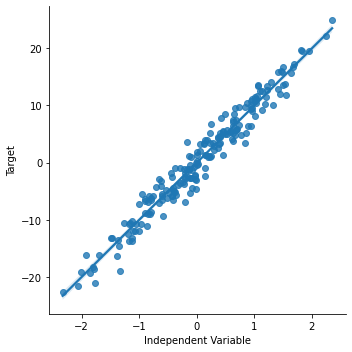

In [7]:
# let's visualize the linear relationships using a scatter plot 

sns.lmplot(x = "x", y = "y", data = data, order=1)
plt.ylabel('Target')
plt.xlabel('Independent Variable')

In [8]:
# to evaluate the linear relationship using residual plats, we need to first build a linear regression model between x and y:

linreg = LinearRegression()
linreg.fit(data['x'].to_frame(), data['y'])

LinearRegression()

In [9]:
# let's make predictions of y using the fitted linear model: 

predictions = linreg.predict(data['x'].to_frame())

# find the difference between the predictions and the real outcome, y, that's the residuals 


residuals = data['y'] - predictions 

Text(0.5, 0, 'Independent variable x')

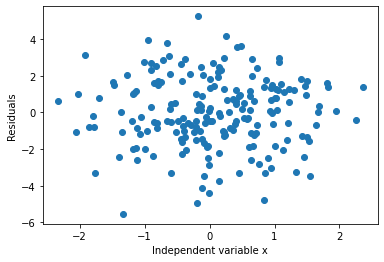

In [10]:
# Let's make a scatter plot of the indepedent variable x and the residuals: 

plt.scatter (y=residuals, x = data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')

Text(0.5, 6.79999999999999, 'Residuals')

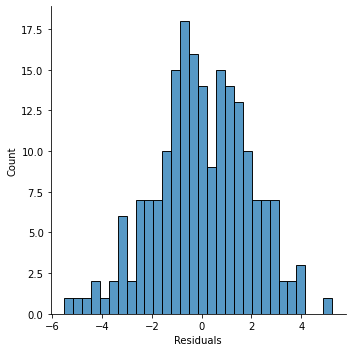

In [11]:
#let's evaualte the distribution of the residuals: 

sns.displot(residuals, bins = 30)
plt.xlabel('Residuals')

lets identify linear relationships in the boston dataset 

In [16]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# the dataset for the demo
from sklearn.datasets import load_boston

# for linear regression
from sklearn.linear_model import LinearRegression

In [17]:
# load the the Boston House price data from scikit-learn

# this is how we load the boston dataset from sklearn
boston_dataset = load_boston()

# create a dataframe with the independent variables
boston = pd.DataFrame(boston_dataset.data,
                      columns=boston_dataset.feature_names)

# add the target
boston['MEDV'] = boston_dataset.target

boston.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


The aim is to predict the "Median value of the houses" MEDV column of this dataset


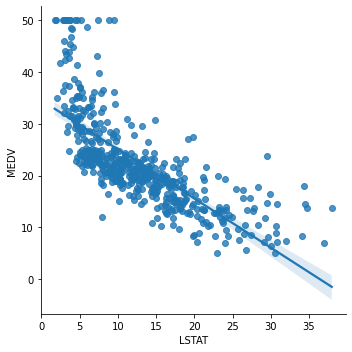

In [19]:
# let's make a scatter plot for the boston house price dataset
# We plot the variable LASTvs the target MEDV

sns.lmplot(x="LSTAT", y="MEDV", data=boston, order=1)

We can observe that there is fairly linear relationship between these two varaibles 

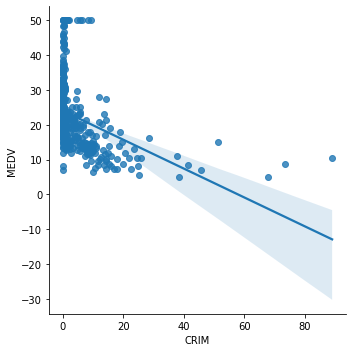

In [20]:
sns.lmplot(x="CRIM", y="MEDV", data=boston, order=1)

Linear relationships can also be assessed by evaluating the residuals. Residuals are the difference between the value estimated by the linear relationship and the real output. If the relationship is linear, the residuals should be normally distributed and centered around zero.

Text(0, 0.5, 'MEDV')

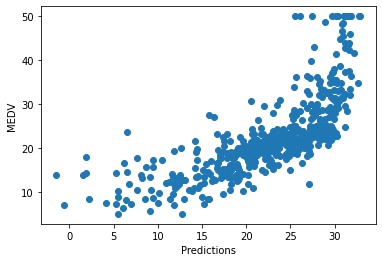

In [22]:
# now we do the same for the variable LSTAT of the boston
# house price dataset from sklearn

# call the linear model from sklearn
linreg = LinearRegression()

# fit the model
linreg.fit(boston['LSTAT'].to_frame(), boston['MEDV'])

# make the predictions
pred = linreg.predict(boston['LSTAT'].to_frame())

# calculate the residuals
error = boston['MEDV'] - pred

# plot predicted vs real
plt.scatter(x=pred, y=boston['MEDV'])
plt.xlabel('Predictions')
plt.ylabel('MEDV')

Text(0.5, 0, 'LSTAT')

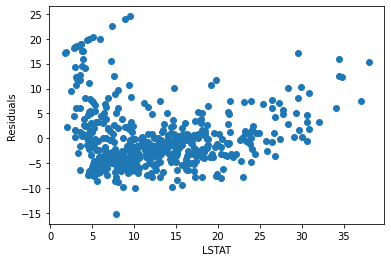

In [23]:
# Residuals plot

# if the relationship is linear, the noise should be
# random, centered around zero, and follow a normal distribution

plt.scatter(y=error, x=boston['LSTAT'])
plt.ylabel('Residuals')
plt.xlabel('LSTAT')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


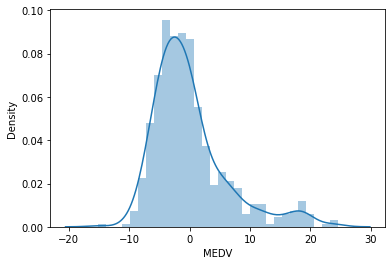

In [24]:
# plot a histogram of the residuals
# they should follow a gaussian distribution
sns.distplot(error, bins=30)

For this particular case, the residuals are centered around zero, but they are not homogeneously distributed across the values of LSTAT. Bigger and smaller values of LSTAT show higher residual values. In addition, we see in the histogram that the residuals do not adopt a strictly Gaussian distribution.

